# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from joblib import dump
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [ ]:
import pandas as pd
merged_data_short = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merged_data_short.csv")

# ARIMA

## Deciding on parameters

In [ ]:
# Combining 'date' and 'hour' columns to create a datetime index
subset_df['datetime'] = pd.to_datetime(subset_df['date']) + pd.to_timedelta(subset_df['hour'], unit='h')

# Setting the datetime column as the index
subset_df.set_index('datetime', inplace=True)

# Dropping the original 'date' and 'hour' columns as they are no longer needed
subset_df.drop(['date', 'hour'], axis=1, inplace=True)

In [ ]:
subset_df = subset_df['start_count']
subset_df

In [ ]:
# Use auto_arima on the full dataset or train set
model = auto_arima(subset_df, start_p=1, start_q=1, max_p=3,
                   max_q=3, m=7, seasonal=False, d=1, D=1,
                   trace=True, error_action='ignore',
                   suppress_warnings=True, stepwise=True)

# Fit the ARIMA model on the train set
model.fit(subset_df)


# ARIMA

In [ ]:
Arima_short = merged_data_short[['date', 'start_count', "hour"]]

# Sort by 'date' (and other relevant columns if necessary)
Arima_short = Arima_short.sort_values(by=['date', 'hour'])

Arima_short.drop(columns=["hour"], inplace=True)

Arima_short['date'] = pd.to_datetime(Arima_short['date'])

# Setting the datetime column as the index
Arima_short.set_index('date', inplace=True)


In [ ]:
# Assuming Arima_short is your DataFrame and the index is a datetime
split_date = '2022-11-30'

# Split the data
X_train = Arima_short[Arima_short.index <= split_date]
X_test = Arima_short[Arima_short.index > split_date]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally convert these arrays back to DataFrames, if needed
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


In [ ]:
model = ARIMA(X_train_scaled_df['start_count'], order=(3,1,3))
model_fit = model.fit()

In [ ]:
# Assuming 'model_fit' is your trained model
dump(model_fit, '/content/drive/MyDrive/Colab Notebooks/model_ARIMA.joblib')


In [ ]:
# Forecast
forecasts = model_fit.forecast(steps=len(X_test_scaled_df))
# Evaluate forecasts
mse = mean_squared_error(X_test_scaled_df, forecasts)
rmse = sqrt(mse)
mae = mean_absolute_error(X_test_scaled_df, forecasts)

print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)


# Plotting ARIMA models

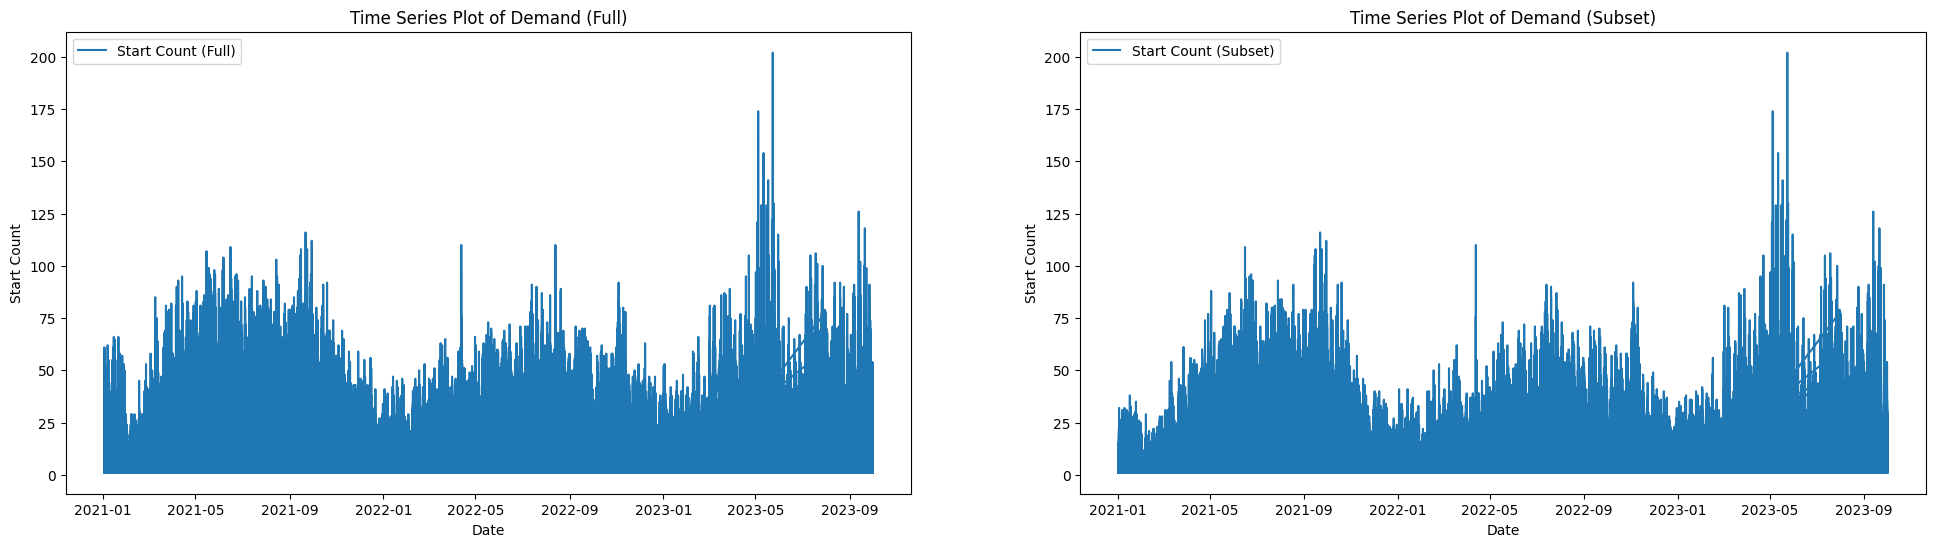

In [ ]:
len_full = len(df_plot_sample_2)
len_subset = len(df_plot_sample)

# Create a date range starting from 2021-01-01
date_range_full = pd.date_range(start='2021-01-01', periods=len_full, freq='H')
date_range_subset = pd.date_range(start='2021-01-01', periods=len_subset, freq='H')

# Set up a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(24, 6))

axs[0].plot(date_range_full, df_plot_sample_2, label='Start Count (Full)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Start Count')
axs[0].set_title('Time Series Plot of Demand (Full)')
axs[0].legend()

axs[1].plot(date_range_subset, df_plot_sample, label='Start Count (Subset)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Start Count')
axs[1].set_title('Time Series Plot of Demand (Subset)')
axs[1].legend()

plt.show()


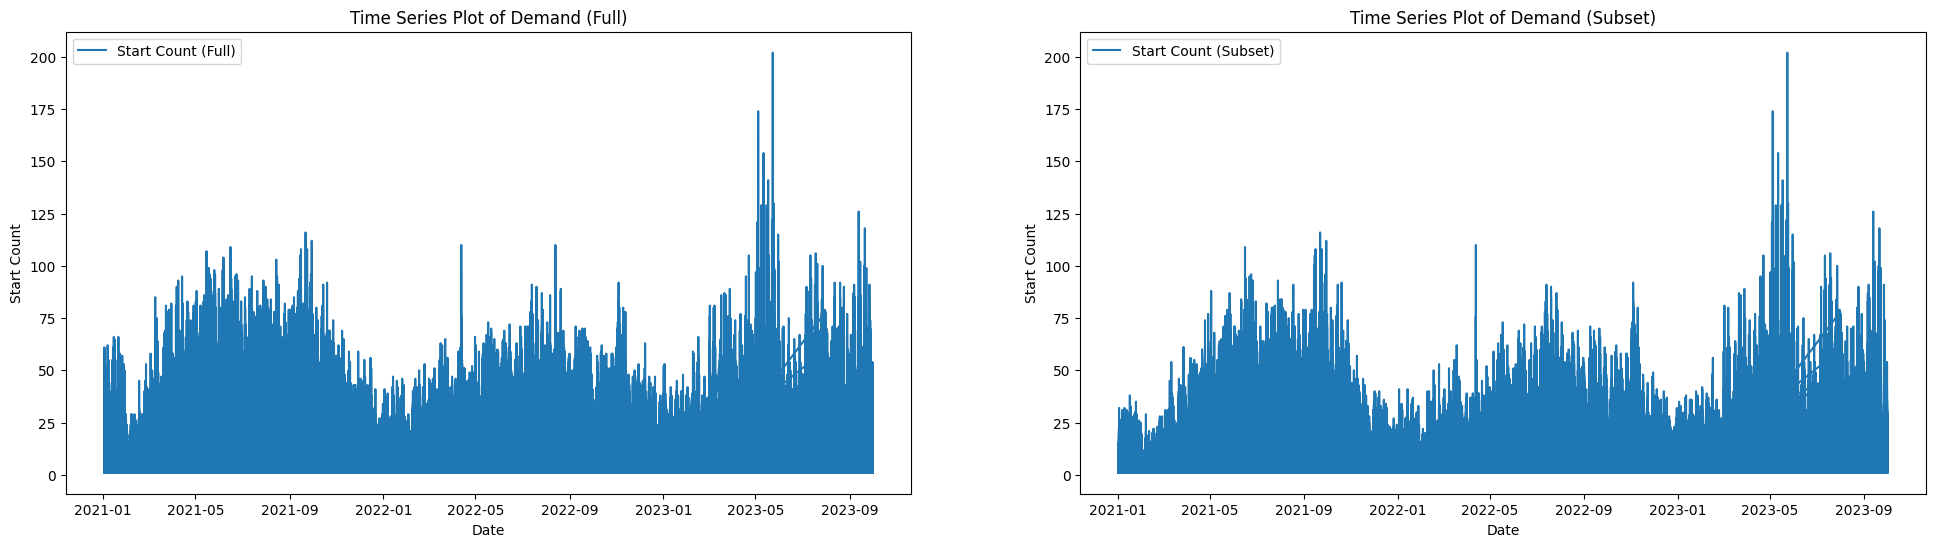

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the length of your datasets
len_full = len(df_plot_sample_2)
len_subset = len(df_plot_sample)

# Create a date range starting from 2021-01-01
date_range_full = pd.date_range(start='2021-01-01', periods=len_full, freq='H')
date_range_subset = pd.date_range(start='2021-01-01', periods=len_subset, freq='H')

# Set up a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 2 columns

# Plot on the first subplot for the full dataset
axs[0].plot(date_range_full, df_plot_sample_2, label='Start Count (Full)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Start Count')
axs[0].set_title('Time Series Plot of Demand (Full)')
axs[0].legend()

# Plot on the second subplot for the subset
axs[1].plot(date_range_subset, df_plot_sample, label='Start Count (Subset)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Start Count')
axs[1].set_title('Time Series Plot of Demand (Subset)')
axs[1].legend()

# Display the plot
plt.show()


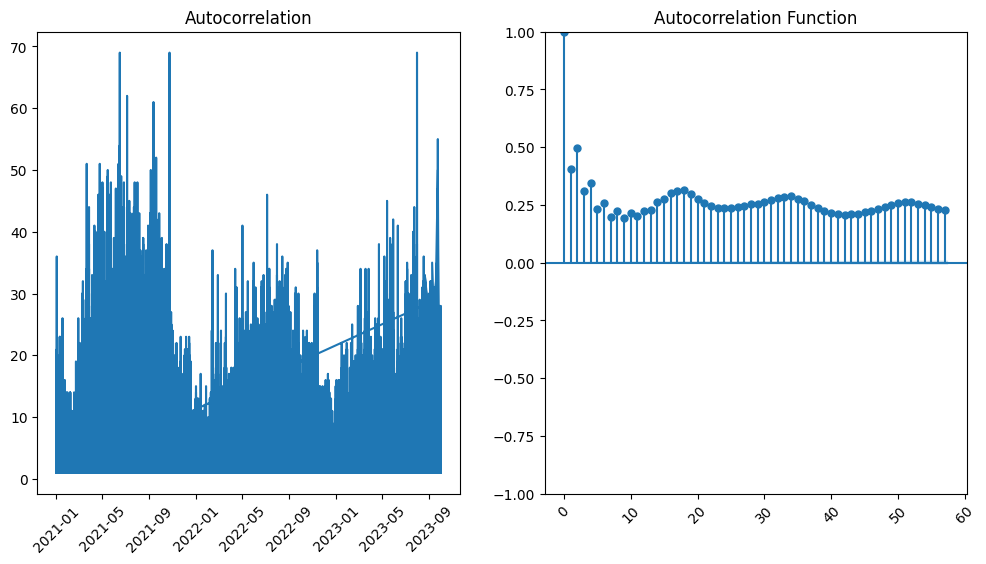

In [ ]:
f = plt.figure(figsize=(12, 6))

# First subplot for 1st Order Differencing
ax1 = f.add_subplot(121)
ax1.set_title('Autocorrelation')
ax1.plot(merged_data_short['start_count'])
ax1.tick_params(axis='x', rotation=45)
# Second subplot for ACF
ax2 = f.add_subplot(122)
plot_acf(merged_data_short['start_count'].dropna(), ax=ax2)
ax2.set_title('Autocorrelation Function')
ax2.tick_params(axis='x', rotation=45)

plt.show()
